# Loan Application Status Prediction

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
df=pd.read_csv("loan_prediction.csv")    #Reading csv file
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# target column Loan_Status is categorical so it's a classification problem.

In [233]:
#datatypes of the columns
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# EDA

In [234]:
#Checking shape of dataset
df.shape

(614, 13)

we have 614 rows and 13 columns in the dataset

In [235]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [236]:
#count of each data classes in the dataset

In [237]:
df['Loan_ID'].value_counts()

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
LP002315    1
LP002317    1
LP002318    1
LP002319    1
LP002332    1
LP002236    1
LP002335    1
LP002337    1
LP002341    1
LP002342    1
LP002345    1
LP002347    1
LP002348    1
LP002301    1
LP002300    1
LP002297    1
LP002296    1
LP002239    1
LP002243    1
LP002244    1
LP002250    1
LP002255    1
LP002262    1
LP002263    1
LP002265    1
LP002266    1
LP002272    1
LP002277    1
LP002281    1
LP002284    1
LP002287    1
LP002288    1
LP002357    1
LP002361    1
LP002362    1
LP002418    1
LP002424    1
LP002429    1
LP002434    1
LP002435    1
LP002443    1
LP002444    1
LP002446    1
LP002447    1
LP002448    1
LP002449    1
LP002453    1
LP002455    1
LP002459    1
LP002467    1
LP002472    1
LP002422    1
LP002409    1
LP002364    1
LP002408    1
LP002366    1
LP002367    1
LP002368    1
LP002369    1
LP002370    1
LP002377    1
LP002379    1
LP002386    1
LP002387    1
LP002390    1
LP002393    1
LP0023

In [238]:
df['Loan_ID'].nunique()

614

In [ ]:
#all the rows are uniqe values in the dataset.

In [239]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
#we can observe male data is more than the female data for loan application in the dataset

In [240]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
#we are able to observ majority of the data is with married people for loan application with 398 applications.

In [241]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
#we can observe that the major applications submitted are having zero dependents with 345 applications and least no of applications in the dataset is for more than 3+ dependence

In [242]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [ ]:
#we can observe majority is for graduate people in the dataset applied loan application with 480 and very less with non graduate in the dataset

In [243]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
#we can observe majority is for non selfemployed people in the dataset applied loan application with 500 and very less with Self_Employed in the dataset

In [244]:
df['ApplicantIncome'].value_counts()

2500     9
4583     6
6000     6
2600     6
3333     5
4166     5
3750     5
5000     5
8333     4
6250     4
2400     4
2583     4
3400     3
2333     3
3000     3
10000    3
3166     3
3500     3
4333     3
3167     3
5417     3
4000     3
3159     2
3083     2
4750     2
5746     2
7333     2
1025     2
4283     2
2833     2
4652     2
3173     2
5703     2
5500     2
12000    2
5250     2
2479     2
14583    2
4300     2
2014     2
3418     2
3859     2
2947     2
2383     2
6400     2
1958     2
3200     2
1820     2
2083     2
2917     2
3510     2
9323     2
3717     2
2378     2
3466     2
2213     2
8750     2
3667     2
1800     2
2666     2
2717     1
2253     1
2309     1
1600     1
2995     1
2149     1
6096     1
2920     1
6256     1
3867     1
81000    1
1926     1
10416    1
3948     1
2769     1
3246     1
5829     1
2720     1
4707     1
5935     1
4606     1
37719    1
8624     1
14880    1
7901     1
6500     1
7250     1
12876    1
7142     1
3539     1
2425     1

In [ ]:
#we cam observe may unique incomes in the dataset

In [245]:
df['CoapplicantIncome'].value_counts()

0.000000        273
2500.000000       5
2083.000000       5
1666.000000       5
2250.000000       3
1750.000000       3
1800.000000       3
1625.000000       3
2333.000000       3
1459.000000       3
5625.000000       3
1843.000000       2
1560.000000       2
1950.000000       2
2167.000000       2
4416.000000       2
1300.000000       2
1250.000000       2
754.000000        2
4750.000000       2
20000.000000      2
2531.000000       2
2000.000000       2
4167.000000       2
2054.000000       2
3167.000000       2
1717.000000       2
1640.000000       2
2569.000000       2
2451.000000       2
2917.000000       2
1833.000000       2
3750.000000       2
3500.000000       2
1917.000000       2
2925.000000       2
1451.000000       2
1430.000000       2
1667.000000       2
3000.000000       2
1376.000000       1
1456.000000       1
1417.000000       1
1733.000000       1
2773.000000       1
1719.000000       1
1993.000000       1
5064.000000       1
1125.000000       1
4300.000000       1


In [ ]:
#we cam observe may unique coapplicant income in the dataset

In [246]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
128.0    11
113.0    11
130.0    10
95.0      9
96.0      9
112.0     8
70.0      8
115.0     8
104.0     7
132.0     7
135.0     7
125.0     7
136.0     7
150.0     7
138.0     6
81.0      6
90.0      6
80.0      6
175.0     6
155.0     6
144.0     6
180.0     6
158.0     6
116.0     6
111.0     5
133.0     5
185.0     5
152.0     5
108.0     5
124.0     5
71.0      5
200.0     5
140.0     5
134.0     4
172.0     4
66.0      4
94.0      4
123.0     4
137.0     4
131.0     4
50.0      4
84.0      4
182.0     4
105.0     4
151.0     4
122.0     4
55.0      4
126.0     4
88.0      4
99.0      4
98.0      4
60.0      4
102.0     3
103.0     3
67.0      3
74.0      3
118.0     3
255.0     3
260.0     3
162.0     3
75.0      3
225.0     3
188.0     3
107.0     3
93.0      3
480.0     3
173.0     3
170.0     3
165.0     3
127.0     3
168.0     3
275.0     3
121.0     2
148.0     2
87.0      2
40.0      2
186.0     2
45.0      2
56.0

In [ ]:
#we cam observe may unique loan amount in the dataset which varies from 9 units to 700 units

In [247]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [250]:
#we can see the given data is of no of months for loan_amount_term based on the given data.it varies from 12 months to 360 months

In [251]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
#we can observe the credit history is maximum in the dataset for 1.0 compared to 0.0 inthe loan application

In [252]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
#we can observe Property_Area with Semiurban has majority in the dataset with rural area least in the dataset

In [253]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
#we are able to see majority of the loan application are being approved with 422 approved applications and 192 rejected as well

# Missing Values

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [255]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

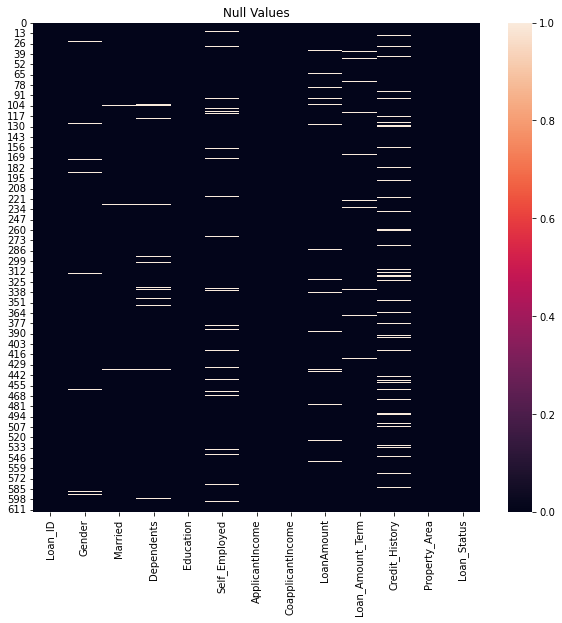

In [256]:
#heatmap on null values
plt.figure(figsize=[10,9])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

we are able to see null values in the columns.

we can observe null values in  the columns Gender,Married ,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term ,Credit_History  

In [257]:
#we can drop the column 'Loan_ID' as its unique values.

In [480]:
#dropping Loan_ID column
df.drop('Loan_ID',axis=1,inplace=True)

In [259]:
#displating max_rows
pd.set_option('display.max_rows',None)

In [260]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


In [481]:
from sklearn.impute import KNNImputer
knnimp = KNNImputer(n_neighbors=2 )

In [482]:

knnimp=pd.DataFrame(knnimp.fit_transform(df[['ApplicantIncome','LoanAmount']]),columns=['ApplicantIncome','LoanAmount'])

In [483]:
df.LoanAmount=knnimp['LoanAmount']

In [484]:
knnimp_1 = KNNImputer(n_neighbors=2 )

In [485]:
knnimp_1=pd.DataFrame(knnimp_1.fit_transform(df[['ApplicantIncome','Loan_Amount_Term']]),columns=['ApplicantIncome','Loan_Amount_Term'])

In [486]:
df.Loan_Amount_Term =knnimp_1['Loan_Amount_Term']

In [487]:
#lets Replace null values in the  categorical columns

df.Gender = df.Gender.fillna(df.Gender.mode()[0])

df.Married = df.Married.fillna(df.Married.mode()[0])

df.Dependents = df.Dependents.fillna(df.Dependents.mode()[0])

df.Self_Employed =df.Self_Employed.fillna(df.Self_Employed.mode()[0])

df.Credit_History = df.Credit_History.fillna(df.Credit_History.mode()[0])


In [268]:
#we have removed all the null values in the dataset by imputation techniques.`

In [488]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [270]:
#we are able to confirm no whitespaces present in the dataset


# Statistics summary

In [271]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.237785,342.361564,0.855049
std,6109.041673,2926.248369,85.547415,64.563230,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1188.500000,127.500000,360.000000,1.000000
75%,5795.000000,2297.250000,166.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [272]:
df.describe(include='O')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,502,401,360,480,532,233,422


As highest number of columns are categorical. The dataset looks pretty neat and clean. Only thing we will be dealing will be on continous data. where there is possibility of small outliers as there is a significant change in mean and median in ApplicantIncome Coapplicant income and loan amount

In [273]:
#duplicates removal
df.drop_duplicates(inplace=True)
df.shape

(614, 12)

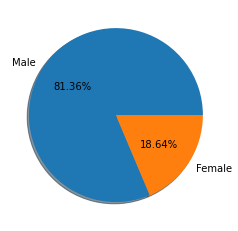

In [5]:
plt.pie(df['Gender'].value_counts(),labels=['Male','Female'],autopct='%1.2f%%', shadow=True);

In [ ]:
#we can observe 81.76% data is with male in the dataset with 18.24% in female in the laon application dataset

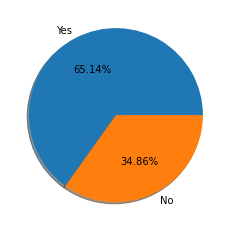

In [6]:
plt.pie(df['Married'].value_counts(),labels=['Yes','No'],autopct='%1.2f%%', shadow=True);

In [ ]:
#we can observe 65.31% data is with Married people in the dataset with 34.69% in non Married in the laon application dataset

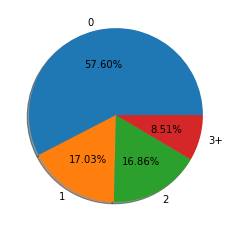

In [7]:
plt.pie(df['Dependents'].value_counts(),labels=['0', '1', '2', '3+'],autopct='%1.2f%%', shadow=True);

In [ ]:
#we can observe 58.63% of the applications are from zero dependent and least in more than 3 dependence having 8.31% in te dataset

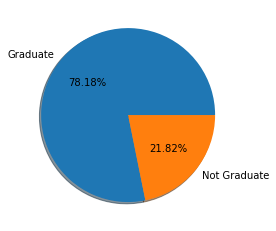

In [8]:
plt.pie(df['Education'].value_counts(),labels=['Graduate', 'Not Graduate'],autopct='%1.2f%%', shadow=True);

In [ ]:
#we can observe 78.18% data is with Graduate people in the dataset with 21.82% in non Graduate in the laon application dataset

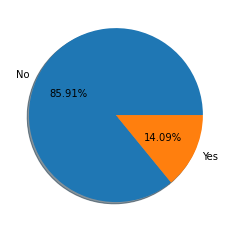

In [9]:
plt.pie(df['Self_Employed'].value_counts(),labels=['No', 'Yes'],autopct='%1.2f%%', shadow=True);

In [ ]:
#we can observe 86.64% data is with non selfemployed people in the dataset with 13.36% in Self_Employed in the laon application dataset

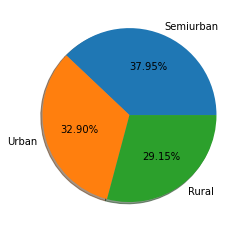

In [4]:
plt.pie(df['Property_Area'].value_counts(),labels=['Semiurban','Urban', 'Rural', ],autopct='%1.2f%%', shadow=True);

In [ ]:
#we can observe 37.95% data is with semiUrban area people in the dataset with 29.15% in Rural in the laon application dataset

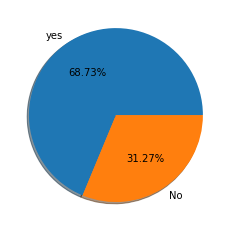

In [10]:
plt.pie(df['Loan_Status'].value_counts(),labels=['yes','No'],autopct='%1.2f%%', shadow=True);

In [ ]:
#we can observe 68.73% data is with loan approved people in the dataset with 31.27% in rejected loans in the laon application dataset

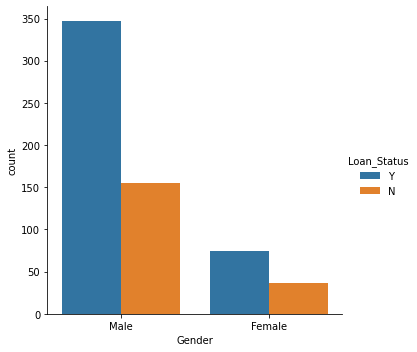

In [283]:
#Factor plot for Gender
sns.factorplot('Gender',kind='count',data=df,hue='Loan_Status')

In [284]:
#Male applicants has more chances of getting loan.We can  see large percentage in loan rejection is for males in the dataset compared to females

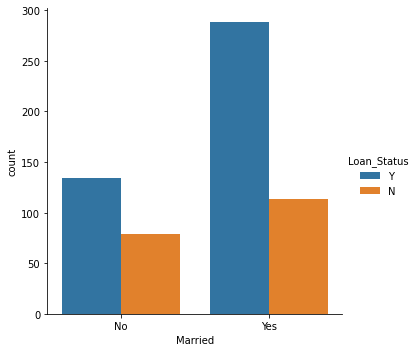

In [285]:
#Factor plot for Married
sns.factorplot('Married',kind='count',data=df,hue='Loan_Status')

we can observe Married people has more chance of getting loan approved.The count of rejection is highfor married people in the dataset compared to the non married people as well.

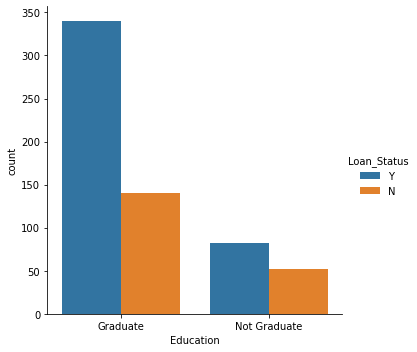

In [286]:
#Factor plot for Education
sns.factorplot('Education',kind='count',data=df,hue='Loan_Status')


Graduated people has more chance of getting loan approved compared to the not graduate people

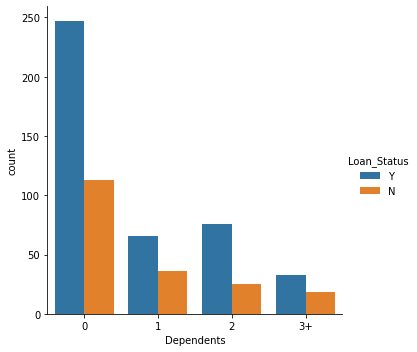

In [287]:
#Factor plot for Dependents
sns.factorplot('Dependents',kind='count',data=df,hue='Loan_Status')

In [374]:
#Applicants with zero dependents has more chance of getting loan approved compared to the rest of the classes

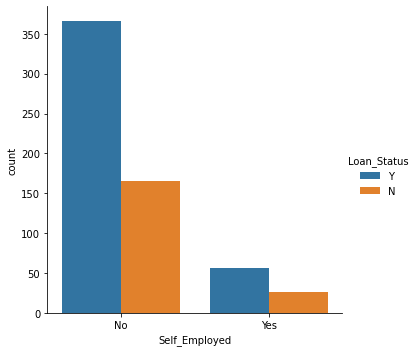

In [289]:
#Factor plot for Self_Employed
sns.factorplot('Self_Employed',kind='count',data=df,hue='Loan_Status' )

In [ ]:
#The applicants who are not self employed has more high chances of getting loan approved compared to self employed data.

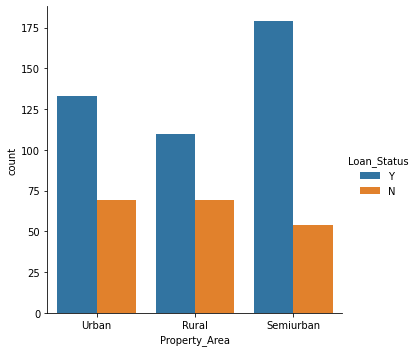

In [290]:
#Factor plot for Property_Area
sns.factorplot('Property_Area',kind='count',data=df,hue='Loan_Status' )

In [ ]:
Applicants having property in semiurban area has more chance of getting loan approved and least chances loan getting appproved is in rura area..

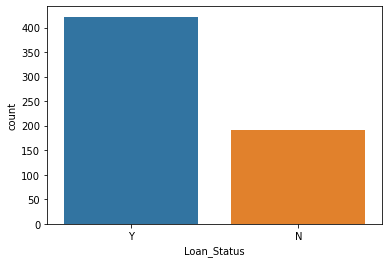

In [291]:
#Count plot for Loan_Status
sns.countplot(df['Loan_Status']);

# Observing the count plot of target column we can say that the data is imbalanced and we need to balance it.

# Bivariate Analysis

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

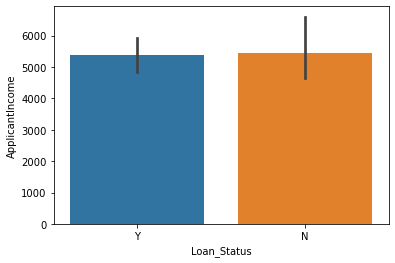

In [489]:
sns.barplot(x='Loan_Status',y='ApplicantIncome',data=df)

we are able to see equal chance in loan being approved as the applicants income is increased

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

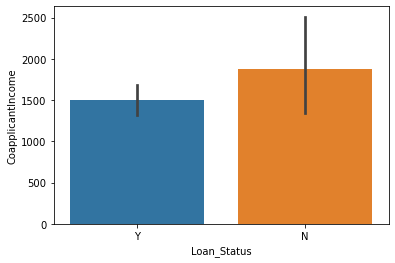

In [490]:
sns.barplot(x='Loan_Status',y='CoapplicantIncome',data=df)

As the co applicant income increases we can in the dataset high probability of loan status being rejected.we have loan status being rejected is more with increase in income

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

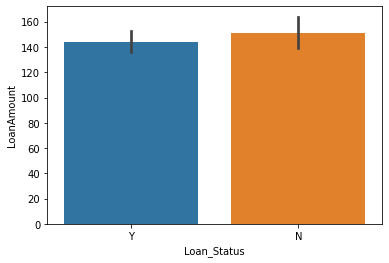

In [491]:
sns.barplot(x='Loan_Status',y='LoanAmount',data=df)

As the loan amount increases we have almost similar number of loan approval rejection.

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

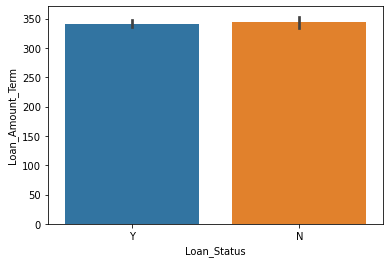

In [492]:
sns.barplot(x='Loan_Status',y='Loan_Amount_Term',data=df)

As the loan amount term increases we can observe equal number of rejecion and approval in the dataset.

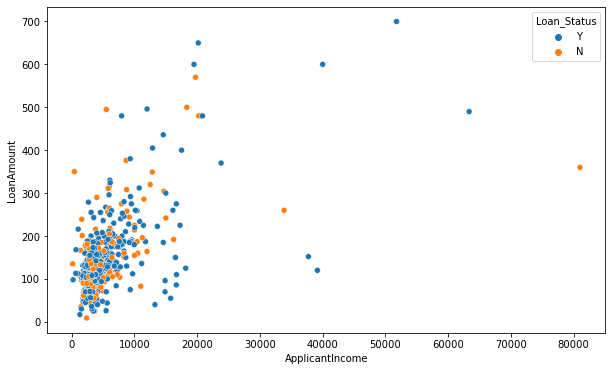

In [493]:
#Comparision between features using scatter plot
plt.figure(figsize=[10,6])
sns.scatterplot(df['ApplicantIncome'],df['LoanAmount'],hue=df['Loan_Status']);

In [ ]:
#There is a high density of points in the range of 0-20000 for ApplicantIncome, and 0-300 for loan amount in the dataset.We can observe higher density in approval rate.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Credit_History'>

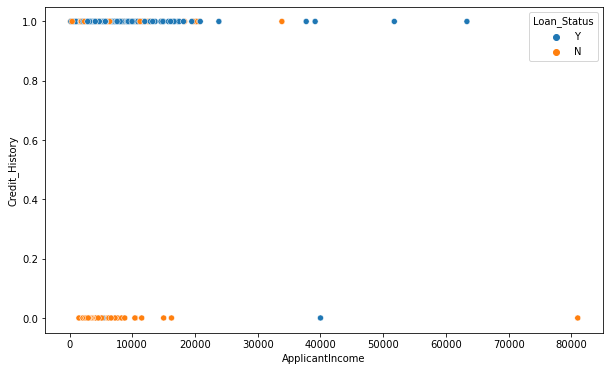

In [495]:
#Comparision between features using scatter plot
plt.figure(figsize=[10,6])

sns.scatterplot(df['ApplicantIncome'],df['Credit_History'],hue=df['Loan_Status'])

If the applicant has credit history 1 then the chances of getting loan approved is more as the  of Applicant Income increases.We can observe the uniform distribution in the range of 0 to 10000

In [496]:
#relationship for each feature name with the output

def scat_plt(a):
    plt.figure()
    sns.scatterplot(x=df[columns[a]],y=df['Loan_Status'],color='red')

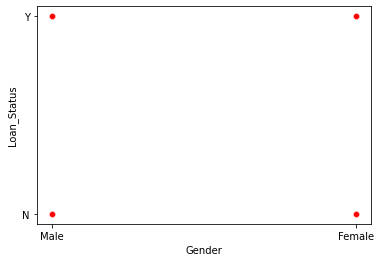

In [497]:
scat_plt(0)

since Gender is categorical variables data it is unevenly distributed in the dataset.

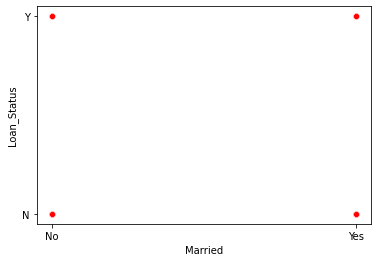

In [498]:
scat_plt(1)

since Married categorical variables data it is unevenly distributed in the dataset.

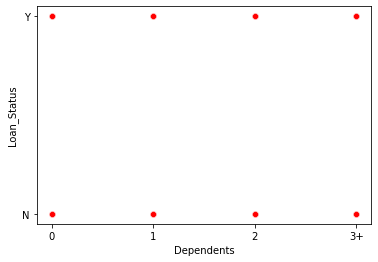

In [499]:
scat_plt(2)

 Dependents data is unevenly distributed in the dataset.

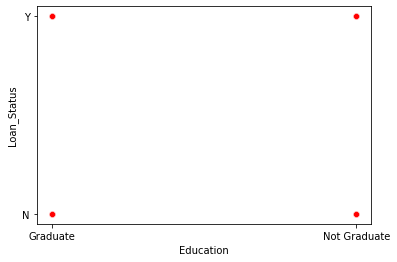

In [500]:
scat_plt(3)

Education data is unevenly distributed in the dataset.

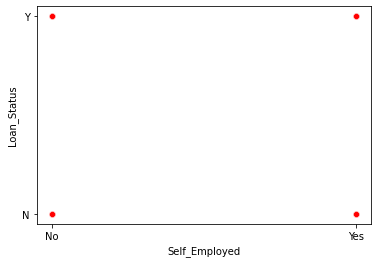

In [501]:
scat_plt(4)

Selfemployed data is unevenly distributed in the dataset.

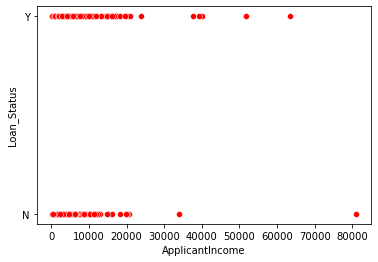

In [502]:
scat_plt(5)

we are able to see the value of Applicant income is normally distributed in the range 0 to 20000,,in the rest of the range it is unevenly distributed

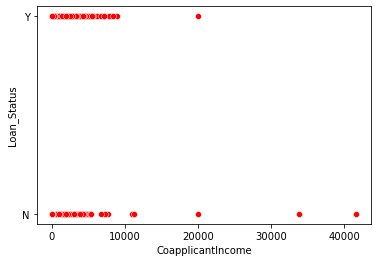

In [503]:
scat_plt(6)

we are able to see the value of coApplicant income is normally distributed in the range 0 to 8000,,in the rest of the range it is unevenly distributed

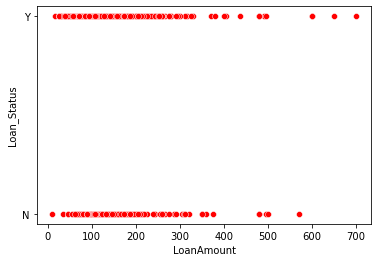

In [504]:
scat_plt(7)

we are able to see the value of loan amount is normally distributed in the range 0 to 300,in the rest of the range it is unevenly distributed


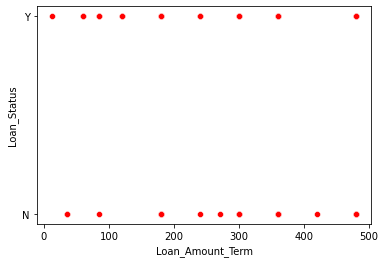

In [505]:
scat_plt(8)

Loan Amount term data is unevenly distributed in the dataset.

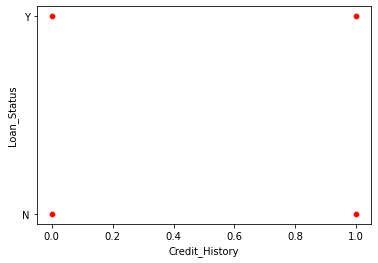

In [506]:
scat_plt(9)

Credit history data is unevenly distributed in the dataset.

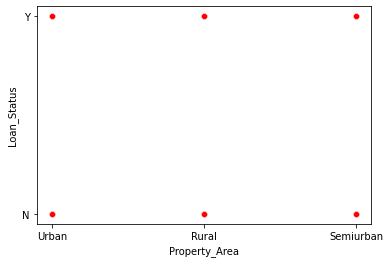

In [507]:
scat_plt(10)

property area data is unevenly distributed in the dataset.

# Multivariate Analysis

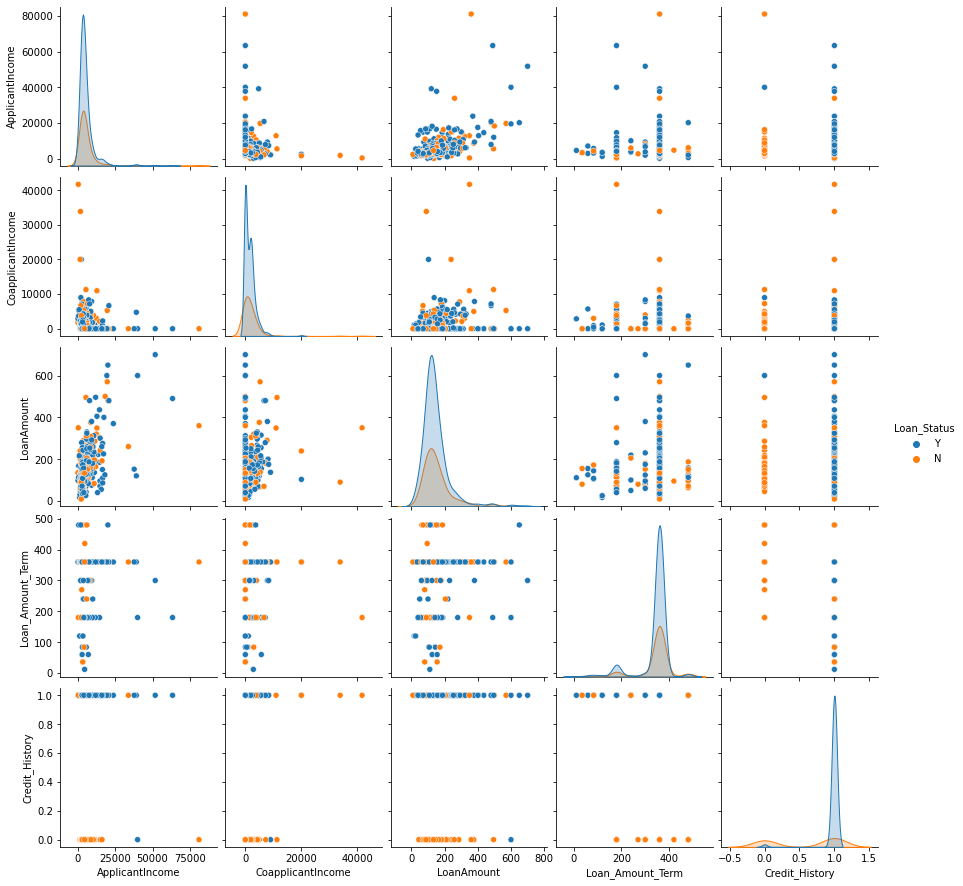

In [510]:
#pair ploting for df
sns.pairplot(df)

successfully plotted pairplot with the given dataset

# Encoding

In [292]:
cat_col=['Gender', 'Married', 'Dependents','Education','Self_Employed','Property_Area', 'Loan_Status']
OE=OrdinalEncoder()

df[cat_col]= df[cat_col].apply(LE.fit_transform)

In [ ]:
LE=LabelEncoder()

succesfully encoded all the categrical columns

In [293]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.000000,141.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.000000,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.000000,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.000000,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.000000,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.000000,267.0,360.0,1.0,2,1
6,1,1,0,1,0,2333,1516.000000,95.0,360.0,1.0,2,1
7,1,1,3,0,0,3036,2504.000000,158.0,360.0,0.0,1,0
8,1,1,2,0,0,4006,1526.000000,168.0,360.0,1.0,2,1
9,1,1,1,0,0,12841,10968.000000,349.0,360.0,1.0,1,0


In [295]:

#distribution plot

def dtp(a):
    plt.figure()
    sns.distplot(df[columns[a]],color='brown',bins=5)
    


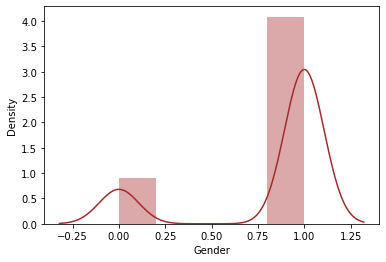

In [296]:
dtp(0)

In [ ]:
#The data looks  skewed.The building block is out of the normalised curve.and it ia binomial

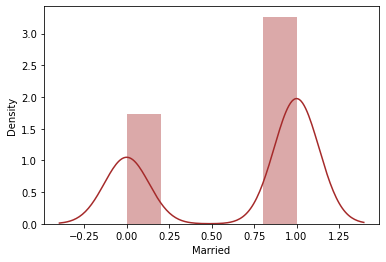

In [297]:
dtp(1)

In [ ]:
#The data looks skewed.The building block is out of the normalised curve.and it is binomial

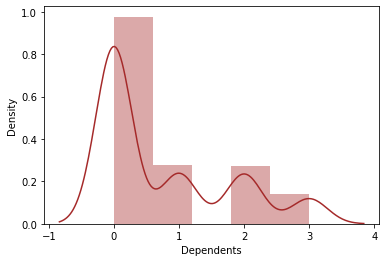

In [298]:
dtp(2)

In [ ]:
#The data looks right skewed.The building block is out of the normalised curve.  

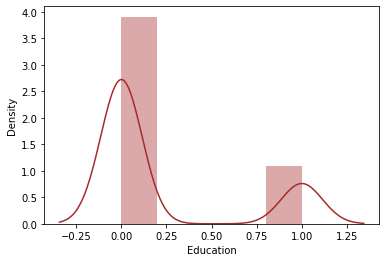

In [299]:
dtp(3)

In [ ]:
#The data looks skewed.The building block is out of the normalised curve.and it ia binomial

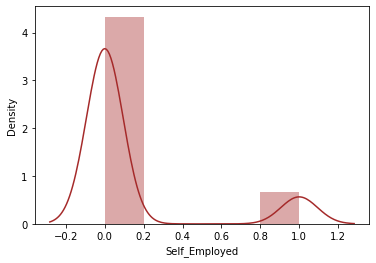

In [300]:
dtp(4)

In [ ]:
#The data looks skewed.The building block is out of the normalised curve.and it ia binomial

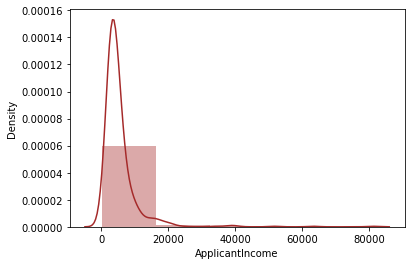

In [301]:
dtp(5)

In [ ]:
#The data looks right skewed.The building block is out of the normalised curve.

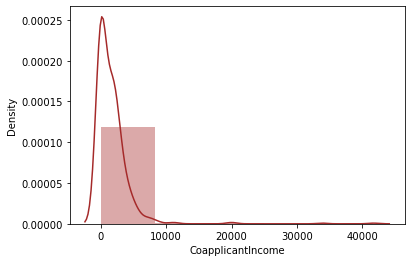

In [302]:
dtp(6)

In [ ]:
#The data looks right skewed.The building block is out of the normalised curve.

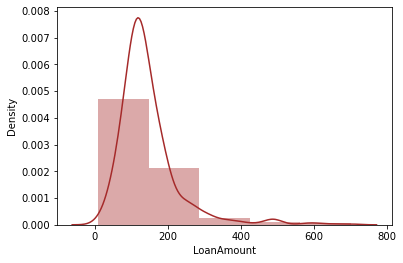

In [303]:
dtp(7)

In [ ]:
#The data looks right skewed.The building block is out of the normalised curve.

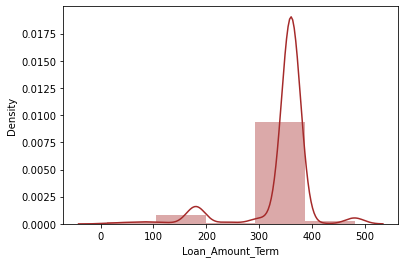

In [304]:
dtp(8)

In [ ]:
#The data looks left skewed.The building block is out of the normalised curve.

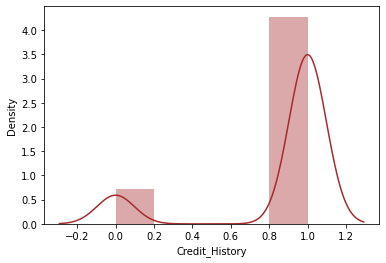

In [305]:
dtp(9)

In [ ]:
#The data looks skewed.The building block is out of the normalised curve.and it ia binomial

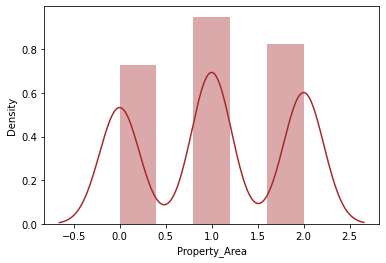

In [306]:
dtp(10)

In [ ]:
#normal distrinution of the dataset is being observed

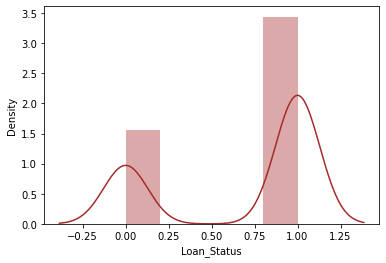

In [307]:
dtp(11)

In [ ]:
#The data looks  skewed.The building block is out of the normalised curve.and it ia binomial

In [308]:
columns=df.columns

# Detecting Outliers

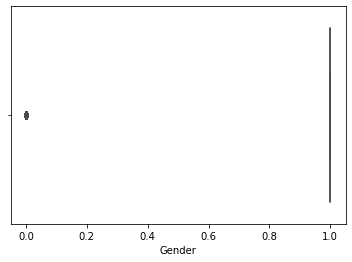

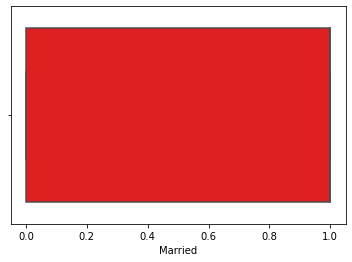

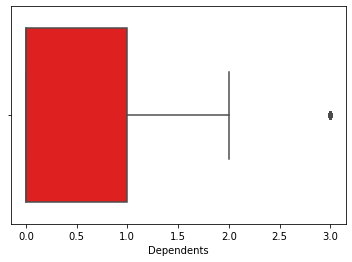

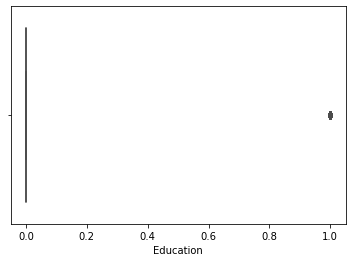

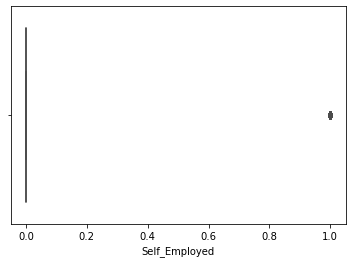

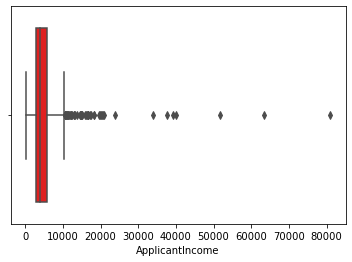

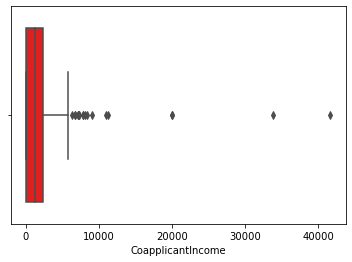

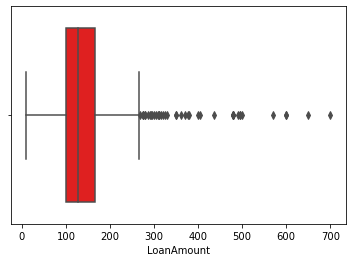

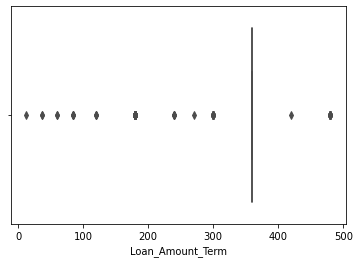

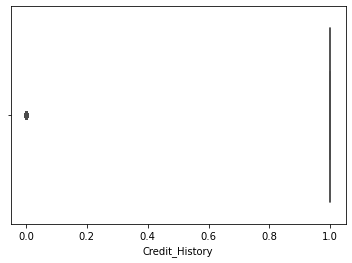

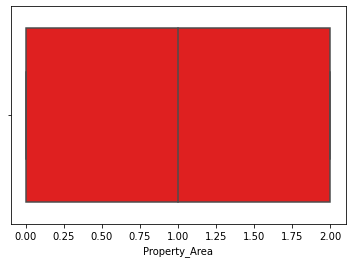

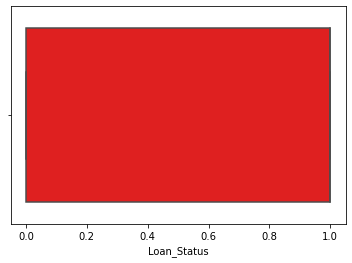

In [309]:
def bxplt(a):
    plt.figure()
    sns.boxplot(df[columns[a]],data=df,color='red')
for i in range(0,12):
    bxplt(i)

# Removing outliers

In [310]:
#zscore

z=np.abs(zscore(df))
z

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,1.372089,0.737806,0.528362,0.392601,0.072991,0.554487,0.061277,0.273419,0.411733,1.223298,0.674519
1,0.472343,0.728816,0.253470,0.528362,0.392601,0.134412,0.038732,0.213363,0.273419,0.411733,1.318513,1.482537
2,0.472343,0.728816,0.737806,0.528362,2.547117,0.393747,0.554487,0.938698,0.273419,0.411733,1.223298,0.674519
3,0.472343,0.728816,0.737806,1.892641,0.392601,0.462062,0.251980,0.306955,0.273419,0.411733,1.223298,0.674519
4,0.472343,1.372089,0.737806,0.528362,0.392601,0.097728,0.554487,0.061277,0.273419,0.411733,1.223298,0.674519
5,0.472343,0.728816,1.244745,0.528362,2.547117,0.002218,0.880600,1.412792,0.273419,0.411733,1.223298,0.674519
6,0.472343,0.728816,0.737806,1.892641,0.392601,0.503019,0.035995,0.599429,0.273419,0.411733,1.223298,0.674519
7,0.472343,0.728816,2.236021,0.528362,0.392601,0.387850,0.301914,0.137606,0.273419,2.428760,0.047607,1.482537
8,0.472343,0.728816,1.244745,0.528362,0.392601,0.228939,0.032575,0.254595,0.273419,0.411733,1.223298,0.674519
9,0.472343,0.728816,0.253470,0.528362,0.392601,1.218457,3.196713,2.372106,0.273419,0.411733,0.047607,1.482537


In [311]:
#printing the outliers points in the dataset
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 284, 308, 313, 333, 333, 369, 402, 409,
       417, 432, 443, 487, 495, 497, 506, 523, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 7, 8, 5,
       7, 7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [312]:
#saving the data without outlier points 
df_new=df[(z<3).all(axis=1)]

In [313]:
#number of rows in df_new
df_new.shape[0]

577

In [314]:
#chcking data loss
data_loss=((df.shape[0]-df_new.shape[0])/df.shape[0])*100
print(data_loss)

6.026058631921824


In [315]:
#the data loss is acceptable,so we will go with the updated dataset to work up on

In [316]:
#saving the upadated dataset 
df=df_new

# Skewness Removal

In [329]:
#initialising X and y
X=df.drop(['Loan_Status'],axis=1)
y=df.Loan_Status

In [330]:
X.skew().sort_values(ascending=False)

Self_Employed        2.229404
ApplicantIncome      2.077466
CoapplicantIncome    1.350517
Education            1.306588
LoanAmount           1.207135
Dependents           1.042909
Property_Area       -0.055332
Married             -0.630211
Gender              -1.622920
Credit_History      -1.976043
Loan_Amount_Term    -2.074979
dtype: float64

In [319]:
#No need to remove skewness in Credit_History,Loan_Amount_Term since we can consider it as categorical column based on the laon appplication procees and the dataset values.

In [331]:
#storing the Non categorical columns with skewness
feat=['ApplicantIncome','CoapplicantIncome', 'LoanAmount']

In [332]:
from sklearn.preprocessing import PowerTransformer
X[feat]=PowerTransformer(method='yeo-johnson').fit_transform(X[feat])

In [333]:
X.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.042909
Education            1.306588
Self_Employed        2.229404
ApplicantIncome      0.029146
CoapplicantIncome   -0.191876
LoanAmount           0.042976
Loan_Amount_Term    -2.074979
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

we are able to remove the skewness for all the columns , and skewness in the categorical column is allowable.

# Oversampling with SMOTE

In [337]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X,y = SM.fit_resample(X,y)

In [338]:
# Checking the updated value counts 
y.value_counts()

1    399
0    399
Name: Loan_Status, dtype: int64

In [339]:
#the dataset is balanced now

# Scaling the data

In [340]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)

# checking multicollinearity

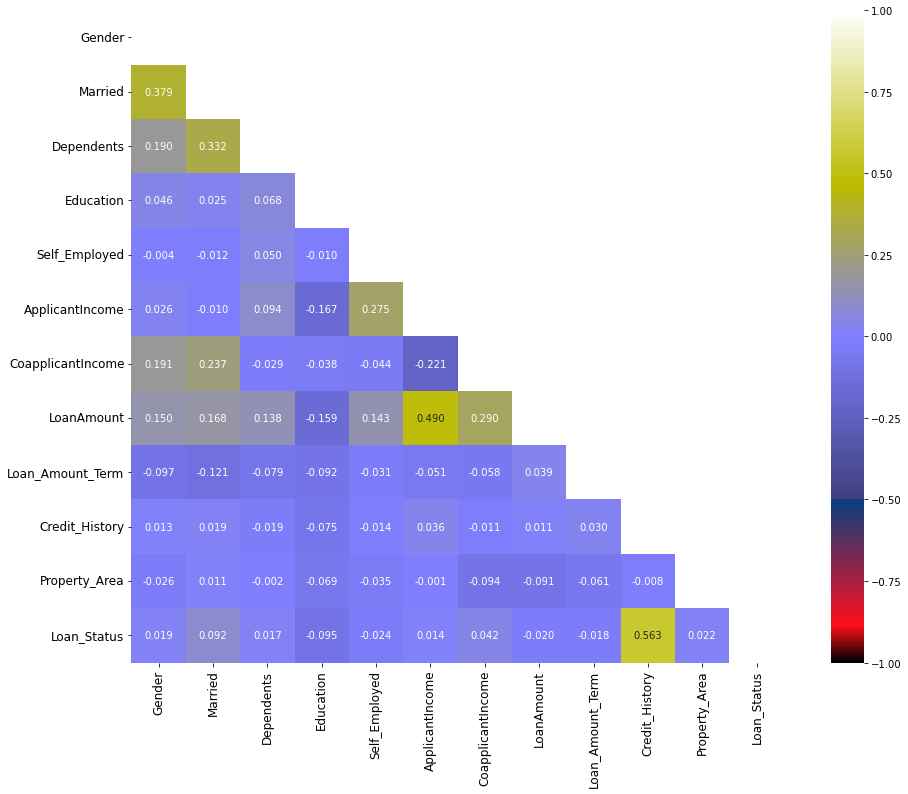

In [343]:
df_cor=df.corr()
upper_triangle = np.triu(df_cor)
plt.figure(figsize=(17,12))
sns.heatmap(df_cor, vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [341]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X.shape[1])]
vif['features']=X.columns

In [342]:
vif

,vif,features
0,1.220380,Gender
1,1.428825,Married
2,1.183106,Dependents
3,1.058199,Education
4,1.065552,Self_Employed
5,1.900615,ApplicantIncome
6,1.646570,CoapplicantIncome
7,1.711683,LoanAmount
8,1.041009,Loan_Amount_Term
9,1.008026,Credit_History


There is no multicollinearity found. we can proceed with data as the values are less than 10.

# Model Building

In [344]:
#X,y already initialized
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.490976,-1.193956,-0.674248,-0.485071,-0.331474,0.732950,-1.121222,0.251279,0.219285,0.571187,1.293483
1,0.490976,0.837552,0.378687,-0.485071,-0.331474,0.266905,0.744337,0.013638,0.219285,0.571187,-1.205789
2,0.490976,0.837552,-0.674248,-0.485071,3.016830,-0.526569,-1.121222,-1.442281,0.219285,0.571187,1.293483
3,0.490976,0.837552,-0.674248,2.061553,-0.331474,-0.801989,0.895925,-0.141173,0.219285,0.571187,1.293483
4,0.490976,-1.193956,-0.674248,-0.485071,-0.331474,0.782048,-1.121222,0.251279,0.219285,0.571187,1.293483


In [444]:
#finding best random_state

maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on random_state ",maxRS)

Best accuracy is  0.86  on random_state  124


In [445]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=124)

In [446]:
# different algorithm going to use

lg=LogisticRegression()
knn=KNeighborsClassifier()
sv=SVC()
dtc=DecisionTreeClassifier()
rf=RandomForestClassifier()
ada=AdaBoostClassifier(n_estimators=100)
gd=GradientBoostingClassifier()
xgb=XGBClassifier()

In [447]:
#code for Training and Prediction 

def evaluate(x):
    model=x
    print(model)
    #training the model
    model.fit(x_train,y_train)
    pred_train=model.predict(x_train)
    #model prediction
    pred=model.predict(x_test)
    
    print("train accuracy score is {:.2f}%".format(accuracy_score(y_train,pred_train)*100))
    print("test accuracy score is {:.2f}%".format(accuracy_score(y_test,pred)*100))
    
    print("\n")
    print("Confusion Matrix : \n",confusion_matrix(y_test,pred))
    print("\n")
    print("Classification Report  : \n",classification_report(y_test,pred))

In [448]:
#calling LogisticRegressionClassifier
evaluate(lg)

LogisticRegression()
train accuracy score is 73.75%
test accuracy score is 86.00%


Confusion Matrix : 
 [[74 16]
 [12 98]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84        90
           1       0.86      0.89      0.88       110

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



In [449]:
#calling KNeighborsClassifier
evaluate(knn)

KNeighborsClassifier()
train accuracy score is 82.61%
test accuracy score is 77.00%


Confusion Matrix : 
 [[71 19]
 [27 83]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.72      0.79      0.76        90
           1       0.81      0.75      0.78       110

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



In [450]:
#calling SVC Classifier
evaluate(sv)

SVC()
train accuracy score is 81.27%
test accuracy score is 81.00%


Confusion Matrix : 
 [[70 20]
 [18 92]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        90
           1       0.82      0.84      0.83       110

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



In [451]:
#calling DecisionTreeClassifier
evaluate(dtc)

DecisionTreeClassifier()
train accuracy score is 100.00%
test accuracy score is 77.50%


Confusion Matrix : 
 [[77 13]
 [32 78]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.71      0.86      0.77        90
           1       0.86      0.71      0.78       110

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.79      0.78      0.78       200



In [452]:
#calling RandomForestClassifier
evaluate(rf)

RandomForestClassifier()
train accuracy score is 100.00%
test accuracy score is 82.00%


Confusion Matrix : 
 [[79 11]
 [25 85]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.76      0.88      0.81        90
           1       0.89      0.77      0.83       110

    accuracy                           0.82       200
   macro avg       0.82      0.83      0.82       200
weighted avg       0.83      0.82      0.82       200



In [453]:
#calling AdaBoostClassifier
evaluate(ada)

AdaBoostClassifier(n_estimators=100)
train accuracy score is 84.11%
test accuracy score is 78.00%


Confusion Matrix : 
 [[71 19]
 [25 85]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.74      0.79      0.76        90
           1       0.82      0.77      0.79       110

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



In [454]:
#calling GradientBoostingClassifier
evaluate(gd)

GradientBoostingClassifier()
train accuracy score is 91.97%
test accuracy score is 78.50%


Confusion Matrix : 
 [[71 19]
 [24 86]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.75      0.79      0.77        90
           1       0.82      0.78      0.80       110

    accuracy                           0.79       200
   macro avg       0.78      0.79      0.78       200
weighted avg       0.79      0.79      0.79       200



In [455]:
#calling XGBClassifier
evaluate(xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
train accuracy score is 100.00%
test accuracy score is 77.50%


Confusion Matrix : 
 [[77 13]
 [32 78]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.71      0.86      0.77        90
           1     

In [456]:
model=[lg,knn,sv,dtc,rf,ada,gd,xgb]

for m in model:
    score=cross_val_score(m,X,y,cv=5)
    print(m,"Cross val score is ",score*100,"   ")
    print("mean is ",score.mean()*100,"\n\n")



LogisticRegression() Cross val score is  [68.125      70.625      78.75       79.24528302 71.69811321]    
mean is  73.68867924528301 


KNeighborsClassifier() Cross val score is  [69.375      71.25       76.875      79.24528302 73.58490566]    
mean is  74.06603773584905 


SVC() Cross val score is  [68.125      72.5        78.125      78.6163522  75.47169811]    
mean is  74.56761006289308 


DecisionTreeClassifier() Cross val score is  [70.         76.25       76.875      75.47169811 78.6163522 ]    
mean is  75.44261006289308 


RandomForestClassifier() Cross val score is  [71.875      78.125      83.125      83.01886792 89.93710692]    
mean is  81.21619496855345 


AdaBoostClassifier(n_estimators=100) Cross val score is  [65.625      71.25       78.125      77.98742138 77.98742138]    
mean is  74.19496855345912 


GradientBoostingClassifier() Cross val score is  [71.25       71.25       81.25       80.50314465 81.76100629]    
mean is  77.20283018867924 


XGBClassifier(base_sco

# By comparing both cross validation accuracy and actual accuracy. It is found that RandomForestClassifier is the best model with a difference of 0.79

In [457]:
#checking the parameters for KNeighborsClassifier model
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [458]:
#parameters of RandomForestClassifier 
grid_params = { 
    'n_estimators':[100,200,300,400,500],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth' : range(2,20,3),
    'criterion' :['gini', 'entropy','log_loss'],
    'min_samples_leaf' :range(1,10,2),
    'min_samples_split' :range(2,10,2)
}

In [461]:
from sklearn.model_selection import GridSearchCV

grid_search= GridSearchCV(estimator=rf,param_grid=grid_params,cv= 5,n_jobs=-1)

In [462]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 20, 3),
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': [100, 200, 300, 400, 500]})

In [463]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 17,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [464]:
rfc=RandomForestClassifier(max_features='sqrt',max_depth=17,criterion='gini',min_samples_leaf=1,min_samples_split=2,n_estimators=300)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=17, n_estimators=300)

In [465]:
#calling hypertuned RandomForestClassifier
evaluate(rfc)

RandomForestClassifier(max_depth=17, n_estimators=300)
train accuracy score is 100.00%
test accuracy score is 81.50%


Confusion Matrix : 
 [[78 12]
 [25 85]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.76      0.87      0.81        90
           1       0.88      0.77      0.82       110

    accuracy                           0.81       200
   macro avg       0.82      0.82      0.81       200
weighted avg       0.82      0.81      0.82       200



with hypertuning the models accuracy is not increased,so we will go with RandomForestClassifier model with out hypertuning .

# AUC_ROC CURVE

In [436]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import plot_roc_curve

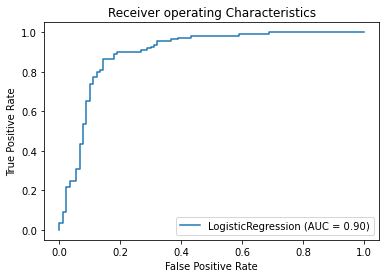

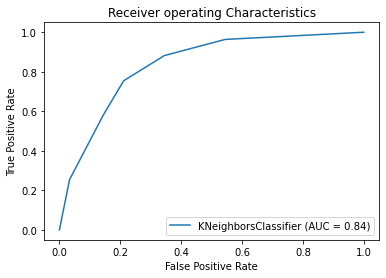

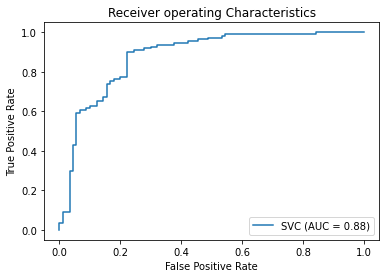

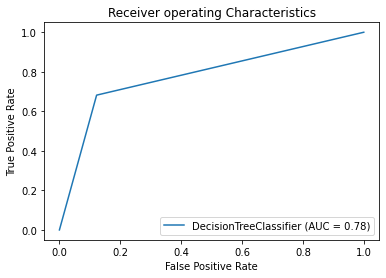

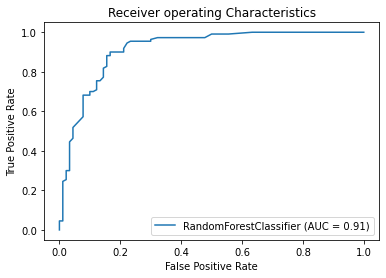

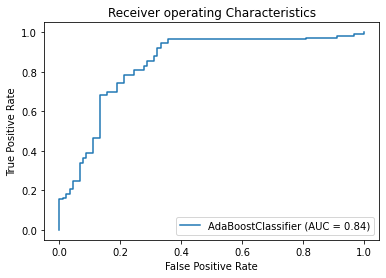

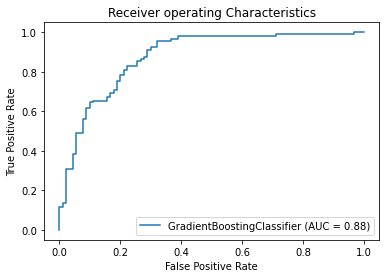

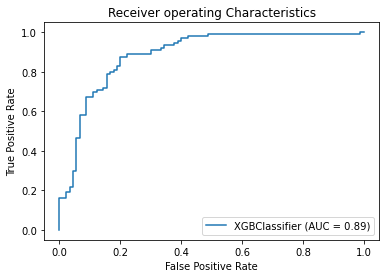

In [466]:
#lets see how well our model works on train data

model=[lg,knn,sv,dtc,rf,ada,gd,xgb]
for m in model:
    ax=m.fit(x_train,y_train)
    plot_roc_curve(ax,x_test,y_test)
    plt.title('Receiver operating Characteristics')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plt.show()

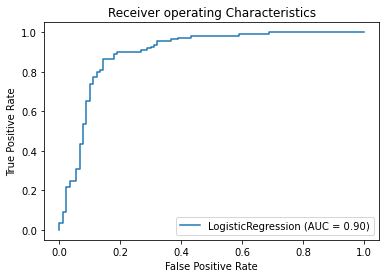

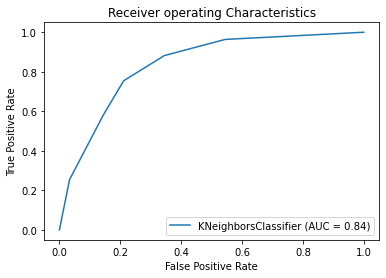

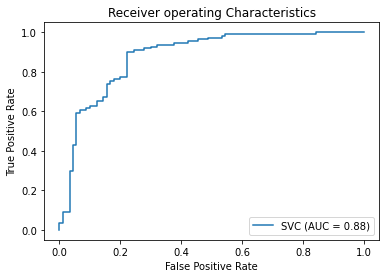

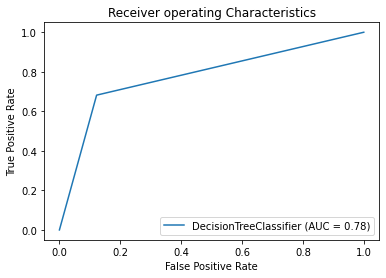

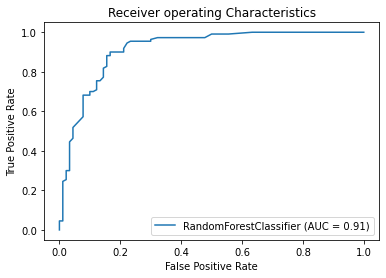

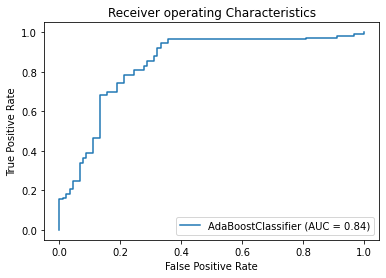

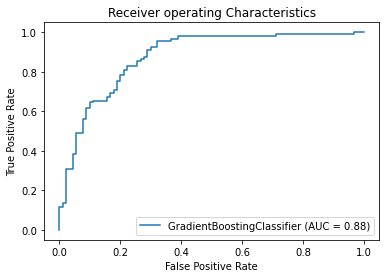

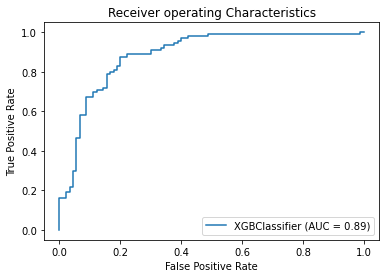

In [467]:
#lets see how well our model works on test data

model=[lg,knn,sv,dtc,rf,ada,gd,xgb]
for m in model:
    plot_roc_curve(m,x_test,y_test)
    plt.title('Receiver operating Characteristics')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

with randomforestclassifier we are getting the 91% in the Roc plot

<Figure size 720x1440 with 0 Axes>

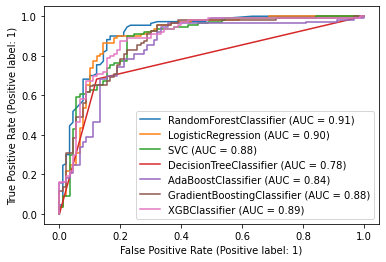

In [473]:
#combining  Roc curve of all models in to single plot

disp = plot_roc_curve(rf,x_test,y_test)
plot_roc_curve(lg, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(sv, x_test, y_test, ax=disp.ax_)
plot_roc_curve(dtc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ada, x_test, y_test, ax=disp.ax_)
plot_roc_curve(gd, x_test, y_test, ax=disp.ax_)
plot_roc_curve(xgb, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':10}, loc='lower right')
plt.show()

RandomForestClassifier Model is the final model with accuracy of 82.00%

# Conclusion

In [475]:
#saving the model
joblib.dump(rf,"Loan_Application.obj")

['Loan_Application.obj']

In [476]:
#Lets Check loading the file 

Loan_Application_status_prediction=joblib.load("Loan_Application.obj")

In [477]:
pred=rf.predict(x_test)
Conclusion=pd.DataFrame([Loan_Application_status_prediction.predict(x_test)[:],pred[:]],index=["Predicted","Original"])
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Predicted,1,0,1,1,1,0,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
Original,1,0,1,1,1,0,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0


we can see it is giving exact data as result. The model is working well

After Training and Testing eight algorithm model. The best accuracy model was determined as random forest classifier with 82.00% true accuracy after all the data cleaning, pre-processing, training and prediction as well as evaluation phase.